In [1]:
!pip install neuralprophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 21.3 MB/s eta 0:00:00


In [ ]:
from neuralprophet import NeuralProphet

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import os

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Path of folder
folder_path = '/content/drive/MyDrive/Colab Notebooks/2024_08_26/'

# Get list of all CSV files in the folder
csv_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to hold the dataframes
dfs = []

# Loop through the CSV files and read each one into a dataframe
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all dataframes into a single dataframe
data = pd.concat(dfs, ignore_index=True)

Mounted at /content/drive


In [ ]:
data_selected = data[['Alarm Name', 'Alarm Location Info', 'First Occurred On', 'Site ID', 'Vendor', 'Domain', 'Device Type']]
data_selected.head(10)

,Alarm Name,Alarm Location Info,First Occurred On,Site ID,Vendor,Domain,Device Type
0,RF Unit DC Input Power Failure,"Cabinet No.=0, Subrack No.=81, Slot No.=0, Boa...",2024-08-24 10:46:12,AM0053,HUAWEI,Access,eNodeB
1,RF Unit Maintenance Link Failure,"Cabinet No.=0, Subrack No.=81, Slot No.=0, Boa...",2024-08-24 10:46:06,AM0053,HUAWEI,Access,eNodeB
2,Cell Unavailable,eNodeB Function Name=Samanthurai_North-AM0053-...,2024-08-24 12:37:37,AM0053,HUAWEI,Access,eNodeB
3,RF Unit DC Input Power Failure,"Cabinet No.=0, Subrack No.=132, Slot No.=0, Bo...",2024-08-24 12:37:37,AM0053,HUAWEI,Access,eNodeB
4,Cell Unavailable,eNodeB Function Name=Samanthurai_North-AM0053-...,2024-08-24 12:37:37,AM0053,HUAWEI,Access,eNodeB
5,RF Unit Maintenance Link Failure,"Cabinet No.=0, Subrack No.=132, Slot No.=0, Bo...",2024-08-24 12:37:31,AM0053,HUAWEI,Access,eNodeB
6,Mains Failure Alarm,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-24 12:11:21,AM0053,HUAWEI,Power,eGBTS
7,Cell Unavailable,eNodeB Function Name=Samanthurai_North-AM0053-...,2024-08-24 11:56:37,AM0053,HUAWEI,Access,eNodeB
8,Cell Unavailable,eNodeB Function Name=Samanthurai_North-AM0053-...,2024-08-24 11:56:37,AM0053,HUAWEI,Access,eNodeB
9,RF Unit DC Input Power Failure,"Cabinet No.=0, Subrack No.=132, Slot No.=0, Bo...",2024-08-24 11:56:37,AM0053,HUAWEI,Access,eNodeB


In [ ]:
# prompt: get only alarms for site id PU0146

PU0146_alarms = data_selected[data_selected['Site ID'] == 'AM0053']
PU0146_alarms.head(10)



,Alarm Name,Alarm Location Info,First Occurred On,Site ID,Vendor,Domain,Device Type
0,RF Unit DC Input Power Failure,"Cabinet No.=0, Subrack No.=81, Slot No.=0, Boa...",2024-08-24 10:46:12,AM0053,HUAWEI,Access,eNodeB
1,RF Unit Maintenance Link Failure,"Cabinet No.=0, Subrack No.=81, Slot No.=0, Boa...",2024-08-24 10:46:06,AM0053,HUAWEI,Access,eNodeB
2,Cell Unavailable,eNodeB Function Name=Samanthurai_North-AM0053-...,2024-08-24 12:37:37,AM0053,HUAWEI,Access,eNodeB
3,RF Unit DC Input Power Failure,"Cabinet No.=0, Subrack No.=132, Slot No.=0, Bo...",2024-08-24 12:37:37,AM0053,HUAWEI,Access,eNodeB
4,Cell Unavailable,eNodeB Function Name=Samanthurai_North-AM0053-...,2024-08-24 12:37:37,AM0053,HUAWEI,Access,eNodeB
5,RF Unit Maintenance Link Failure,"Cabinet No.=0, Subrack No.=132, Slot No.=0, Bo...",2024-08-24 12:37:31,AM0053,HUAWEI,Access,eNodeB
6,Mains Failure Alarm,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-24 12:11:21,AM0053,HUAWEI,Power,eGBTS
7,Cell Unavailable,eNodeB Function Name=Samanthurai_North-AM0053-...,2024-08-24 11:56:37,AM0053,HUAWEI,Access,eNodeB
8,Cell Unavailable,eNodeB Function Name=Samanthurai_North-AM0053-...,2024-08-24 11:56:37,AM0053,HUAWEI,Access,eNodeB
9,RF Unit DC Input Power Failure,"Cabinet No.=0, Subrack No.=132, Slot No.=0, Bo...",2024-08-24 11:56:37,AM0053,HUAWEI,Access,eNodeB


In [ ]:
# prompt: encode the Alarm name column  and rename that column as y

le = LabelEncoder()
PU0146_alarms['y'] = le.fit_transform(PU0146_alarms['Alarm Name'])
PU0146_alarms = PU0146_alarms.drop('Alarm Name', axis=1)
PU0146_alarms.head(10)

,Alarm Location Info,First Occurred On,Site ID,Vendor,Domain,Device Type,y
0,"Cabinet No.=0, Subrack No.=81, Slot No.=0, Boa...",2024-08-24 10:46:12,AM0053,HUAWEI,Access,eNodeB,24
1,"Cabinet No.=0, Subrack No.=81, Slot No.=0, Boa...",2024-08-24 10:46:06,AM0053,HUAWEI,Access,eNodeB,25
2,eNodeB Function Name=Samanthurai_North-AM0053-...,2024-08-24 12:37:37,AM0053,HUAWEI,Access,eNodeB,8
3,"Cabinet No.=0, Subrack No.=132, Slot No.=0, Bo...",2024-08-24 12:37:37,AM0053,HUAWEI,Access,eNodeB,24
4,eNodeB Function Name=Samanthurai_North-AM0053-...,2024-08-24 12:37:37,AM0053,HUAWEI,Access,eNodeB,8
5,"Cabinet No.=0, Subrack No.=132, Slot No.=0, Bo...",2024-08-24 12:37:31,AM0053,HUAWEI,Access,eNodeB,25
6,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-24 12:11:21,AM0053,HUAWEI,Power,eGBTS,19
7,eNodeB Function Name=Samanthurai_North-AM0053-...,2024-08-24 11:56:37,AM0053,HUAWEI,Access,eNodeB,8
8,eNodeB Function Name=Samanthurai_North-AM0053-...,2024-08-24 11:56:37,AM0053,HUAWEI,Access,eNodeB,8
9,"Cabinet No.=0, Subrack No.=132, Slot No.=0, Bo...",2024-08-24 11:56:37,AM0053,HUAWEI,Access,eNodeB,24


In [ ]:
# prompt: give mapping of encoded value to alarm name  print line by line

for i, alarm_name in enumerate(le.classes_):
  print(f'{i}: {alarm_name}')

0: BBU CPRI Interface Error
1: Base Station DC Power Supply Abnormal
2: Battery Deep Discharge Alarm
3: Board Not In Position
4: Carrier Configuration Error
5: Cell Blocked
6: Cell Capability Degraded
7: Cell Out of Service
8: Cell Unavailable
9: Data Configuration Exceeding Licensed Limit
10: ESL Link Fault
11: Ethernet Link Fault
12: Extend Alarm
13: External Clock Reference Problem
14: Fuse Failure Alarm
15: IP Clock Link Failure
16: Inter-Board Service Link Failure
17: Inter-System Site-Level Configuration Conflict
18: Local User Consecutive Login Retries Failed
19: Mains Failure Alarm
20: Monitoring Device Maintenance Link Failure
21: NE Is Disconnected
22: OML Fault
23: RF Unit ALD Current Out of Range
24: RF Unit DC Input Power Failure
25: RF Unit Maintenance Link Failure
26: RF Unit TX Channel Gain Out of Range
27: RF Unit VSWR Threshold Crossed
28: RRU Cascading Levels and Configuration Mismatch
29: Rectifier Failure Alarm
30: Remote Maintenance Link Failure
31: Subrack Type a

In [ ]:
# prompt: rename first occured column as ds

PU0146_alarms = PU0146_alarms.rename(columns={'First Occurred On': 'ds'})
PU0146_alarms.head(10)


,Alarm Location Info,ds,Site ID,Vendor,Domain,Device Type,y
0,"Cabinet No.=0, Subrack No.=81, Slot No.=0, Boa...",2024-08-24 10:46:12,AM0053,HUAWEI,Access,eNodeB,24
1,"Cabinet No.=0, Subrack No.=81, Slot No.=0, Boa...",2024-08-24 10:46:06,AM0053,HUAWEI,Access,eNodeB,25
2,eNodeB Function Name=Samanthurai_North-AM0053-...,2024-08-24 12:37:37,AM0053,HUAWEI,Access,eNodeB,8
3,"Cabinet No.=0, Subrack No.=132, Slot No.=0, Bo...",2024-08-24 12:37:37,AM0053,HUAWEI,Access,eNodeB,24
4,eNodeB Function Name=Samanthurai_North-AM0053-...,2024-08-24 12:37:37,AM0053,HUAWEI,Access,eNodeB,8
5,"Cabinet No.=0, Subrack No.=132, Slot No.=0, Bo...",2024-08-24 12:37:31,AM0053,HUAWEI,Access,eNodeB,25
6,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-24 12:11:21,AM0053,HUAWEI,Power,eGBTS,19
7,eNodeB Function Name=Samanthurai_North-AM0053-...,2024-08-24 11:56:37,AM0053,HUAWEI,Access,eNodeB,8
8,eNodeB Function Name=Samanthurai_North-AM0053-...,2024-08-24 11:56:37,AM0053,HUAWEI,Access,eNodeB,8
9,"Cabinet No.=0, Subrack No.=132, Slot No.=0, Bo...",2024-08-24 11:56:37,AM0053,HUAWEI,Access,eNodeB,24


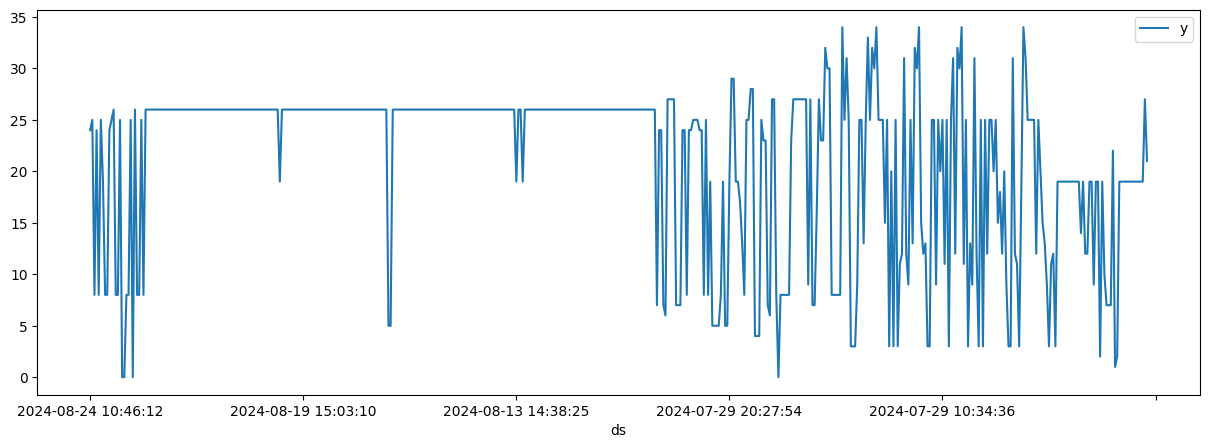

In [ ]:
import pandas as pd

# Load the dataset from the CSV file using pandas
# df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")
# Plot the dataset, showing price (y column) over time (ds column)
plt = PU0146_alarms.plot(x="ds", y="y", figsize=(15, 5))

In [ ]:
# prompt: sort accoding to ds column latest alarms

PU0146_alarms['ds'] = pd.to_datetime(PU0146_alarms['ds'])
PU0146_alarms = PU0146_alarms.sort_values(by='ds', ascending=False)
PU0146_alarms.head(10)


,Alarm Location Info,ds,Site ID,Vendor,Domain,Device Type,y
2,eNodeB Function Name=Samanthurai_North-AM0053-...,2024-08-24 12:37:37,AM0053,HUAWEI,Access,eNodeB,8
3,"Cabinet No.=0, Subrack No.=132, Slot No.=0, Bo...",2024-08-24 12:37:37,AM0053,HUAWEI,Access,eNodeB,24
4,eNodeB Function Name=Samanthurai_North-AM0053-...,2024-08-24 12:37:37,AM0053,HUAWEI,Access,eNodeB,8
5,"Cabinet No.=0, Subrack No.=132, Slot No.=0, Bo...",2024-08-24 12:37:31,AM0053,HUAWEI,Access,eNodeB,25
6,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-24 12:11:21,AM0053,HUAWEI,Power,eGBTS,19
9,"Cabinet No.=0, Subrack No.=132, Slot No.=0, Bo...",2024-08-24 11:56:37,AM0053,HUAWEI,Access,eNodeB,24
7,eNodeB Function Name=Samanthurai_North-AM0053-...,2024-08-24 11:56:37,AM0053,HUAWEI,Access,eNodeB,8
8,eNodeB Function Name=Samanthurai_North-AM0053-...,2024-08-24 11:56:37,AM0053,HUAWEI,Access,eNodeB,8
10,"Cabinet No.=0, Subrack No.=132, Slot No.=0, Bo...",2024-08-24 11:56:31,AM0053,HUAWEI,Access,eNodeB,25
11,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 11:52:08,AM0053,HUAWEI,Access,eNodeB,26


In [ ]:
# prompt: drop rows with y is unknown

PU0146_alarms = PU0146_alarms[PU0146_alarms['y'] != 'Unknown']

In [ ]:
# prompt: remove duplicates in ds

PU0146_alarms = PU0146_alarms.drop_duplicates(subset=['ds'])
PU0146_alarms.head(10)


,Alarm Location Info,ds,Site ID,Vendor,Domain,Device Type,y
2,eNodeB Function Name=Samanthurai_North-AM0053-...,2024-08-24 12:37:37,AM0053,HUAWEI,Access,eNodeB,8
5,"Cabinet No.=0, Subrack No.=132, Slot No.=0, Bo...",2024-08-24 12:37:31,AM0053,HUAWEI,Access,eNodeB,25
6,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-24 12:11:21,AM0053,HUAWEI,Power,eGBTS,19
9,"Cabinet No.=0, Subrack No.=132, Slot No.=0, Bo...",2024-08-24 11:56:37,AM0053,HUAWEI,Access,eNodeB,24
10,"Cabinet No.=0, Subrack No.=132, Slot No.=0, Bo...",2024-08-24 11:56:31,AM0053,HUAWEI,Access,eNodeB,25
11,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 11:52:08,AM0053,HUAWEI,Access,eNodeB,26
12,eNodeB Function Name=Samanthurai_North-AM0053-...,2024-08-24 11:49:10,AM0053,HUAWEI,Access,eNodeB,8
14,"Cabinet No.=0, Subrack No.=82, Slot No.=0, Boa...",2024-08-24 11:49:06,AM0053,HUAWEI,Access,eNodeB,25
16,"Cabinet No.=0, Subrack No.=0, Slot No.=3, Port...",2024-08-24 11:49:02,AM0053,HUAWEI,Access,eNodeB,0
17,eNodeB Function Name=Samanthurai_North-AM0053-...,2024-08-24 11:36:46,AM0053,HUAWEI,Access,eNodeB,8


In [ ]:
# prompt: keep only ds and y columns

PU0146_alarms = PU0146_alarms[['ds', 'y']]
PU0146_alarms.head(10)


,ds,y
2,2024-08-24 12:37:37,8
5,2024-08-24 12:37:31,25
6,2024-08-24 12:11:21,19
9,2024-08-24 11:56:37,24
10,2024-08-24 11:56:31,25
11,2024-08-24 11:52:08,26
12,2024-08-24 11:49:10,8
14,2024-08-24 11:49:06,25
16,2024-08-24 11:49:02,0
17,2024-08-24 11:36:46,8


In [ ]:
# Import the NeuralProphet class
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

PU0146_alarms['ds'] = pd.to_datetime(PU0146_alarms['ds'])  # Ensure 'ds' is datetime
PU0146_alarms = PU0146_alarms.set_index('ds').resample('H').mean().reset_index()

# Create a NeuralProphet model with default parameters
# Set the learning rate and define other hyperparameters directly
m = NeuralProphet(
    learning_rate=0.01,          # Set the learning rate to 0.005
    batch_size=16,
    seasonality_mode='additive',  # Seasonality mode (choose between 'additive' or 'multiplicative')
)

# Use static plotly in notebooks
m.set_plotting_backend("plotly-static")

# Fit the model on the dataset (this might take a bit)
metrics = m.fit(PU0146_alarms)

Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 16. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 13. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/data/split.py:273: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, future_df])

  df = pd.concat([df, future_df])



Predicting: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ds = fcst["ds"].dt.to_pydatetime()

  ds = fcst["ds"].dt.to_pydatetime()



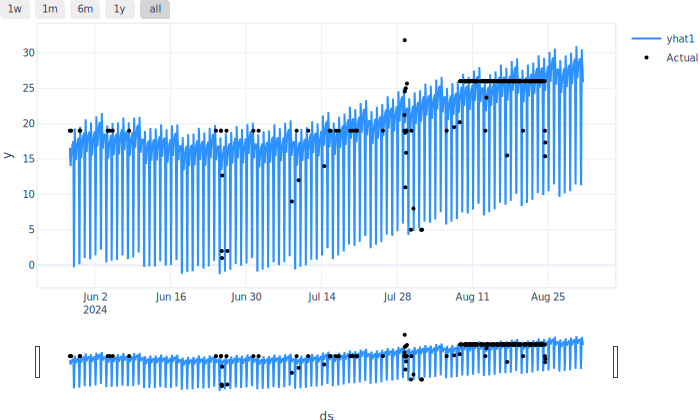

In [ ]:
# Create a new dataframe reaching 24*7 into the future for our forecast, n_historic_predictions also shows historic data
df_future = m.make_future_dataframe(PU0146_alarms, n_historic_predictions=True, periods=24*7)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
m.plot(forecast)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/data/split.py:273: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.




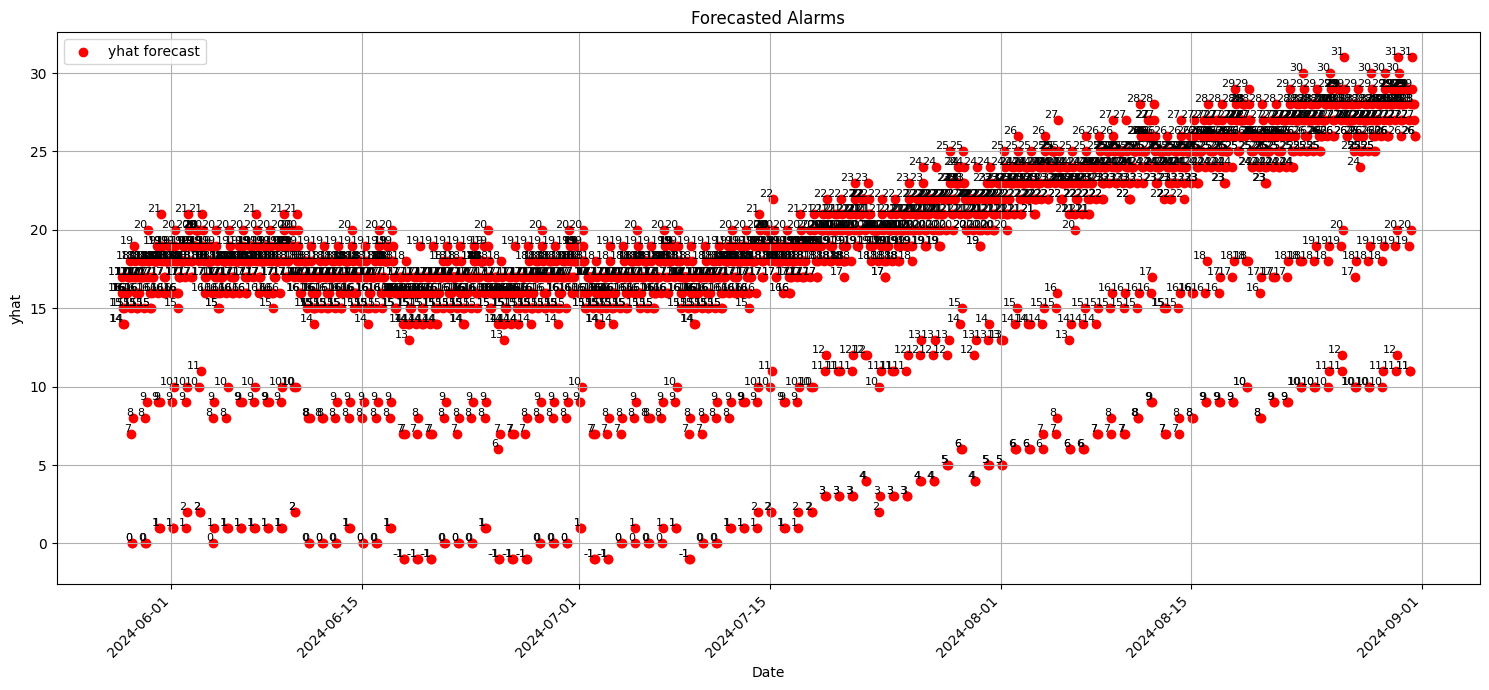

In [ ]:
# Create a new dataframe reaching 7 days into the future for our forecast
df_future = m.make_future_dataframe(PU0146_alarms, n_historic_predictions=True, periods=24*7)

import matplotlib.pyplot as plt

# Round predictions to the nearest integer
forecast['yhat1'] = forecast['yhat1'].round().astype(int)

# Extract the date from the datetime
forecast['date'] = forecast['ds'].dt.date

# No limit applied, include all predictions
daily_predictions = forecast.reset_index(drop=True)

# Plot 'yhat' as dots on top of the existing plot
plt.figure(figsize=(15, 7))  # Create a new figure with adjusted size
plt.scatter(daily_predictions['ds'], daily_predictions['yhat1'], color='red', label='yhat forecast')

# Add labels to data points
for i, row in daily_predictions.iterrows():
    plt.text(row['ds'], row['yhat1'], f'{row["yhat1"]}', fontsize=8, ha='right', va='bottom')

plt.xlabel('Date')
plt.ylabel('yhat')
plt.title('Forecasted Alarms')
plt.legend()
plt.grid(True)  # Add grid lines for better readability

# Set x-axis ticks to show all dates, rotate for better readability
plt.xticks(rotation=45, ha='right')

# Automatically set y-axis ticks based on data
plt.yticks()

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()  # Display the plot

In [ ]:
# prompt: print the forecast alarms around value 13  with the date, print only the data after the latest day of initial data

# Filter forecast for alarms around value 13
filtered_forecast = forecast[(forecast['yhat1'] == 26)]

# Get the latest date in the original data
last_date = PU0146_alarms['ds'].max()

# Filter for dates after the last date in the original data
filtered_forecast = filtered_forecast[filtered_forecast['ds'] > last_date]

# Print the filtered forecast with date and yhat1
for index, row in filtered_forecast.iterrows():
  print(f"Date: {row['ds']}, Alarm (yhat1): {row['yhat1']:.2f}")


Date: 2024-08-24 13:00:00, Alarm (yhat1): 26.00
Date: 2024-08-24 14:00:00, Alarm (yhat1): 26.00
Date: 2024-08-24 15:00:00, Alarm (yhat1): 26.00
Date: 2024-08-25 00:00:00, Alarm (yhat1): 26.00
Date: 2024-08-25 11:00:00, Alarm (yhat1): 26.00
Date: 2024-08-25 12:00:00, Alarm (yhat1): 26.00
Date: 2024-08-26 11:00:00, Alarm (yhat1): 26.00
Date: 2024-08-26 12:00:00, Alarm (yhat1): 26.00
Date: 2024-08-27 05:00:00, Alarm (yhat1): 26.00
Date: 2024-08-27 09:00:00, Alarm (yhat1): 26.00
Date: 2024-08-27 14:00:00, Alarm (yhat1): 26.00
Date: 2024-08-27 15:00:00, Alarm (yhat1): 26.00
Date: 2024-08-28 10:00:00, Alarm (yhat1): 26.00
Date: 2024-08-28 13:00:00, Alarm (yhat1): 26.00
Date: 2024-08-29 00:00:00, Alarm (yhat1): 26.00
Date: 2024-08-29 10:00:00, Alarm (yhat1): 26.00
Date: 2024-08-29 11:00:00, Alarm (yhat1): 26.00
Date: 2024-08-29 12:00:00, Alarm (yhat1): 26.00
Date: 2024-08-30 11:00:00, Alarm (yhat1): 26.00
Date: 2024-08-31 11:00:00, Alarm (yhat1): 26.00
Date: 2024-08-31 12:00:00, Alarm (yhat1)

In [ ]:
# prompt: for above output print unique alarm per day

# Group by date and get the unique alarm values
unique_alarms_per_day = filtered_forecast.groupby('date')['yhat1'].unique()

# Print the unique alarms for each day
for date, alarms in unique_alarms_per_day.items():
    print(f"Date: {date}, Unique Alarms: {alarms}")


Date: 2024-08-24, Unique Alarms: [26]
Date: 2024-08-25, Unique Alarms: [26]
Date: 2024-08-26, Unique Alarms: [26]
Date: 2024-08-27, Unique Alarms: [26]
Date: 2024-08-28, Unique Alarms: [26]
Date: 2024-08-29, Unique Alarms: [26]
Date: 2024-08-30, Unique Alarms: [26]
Date: 2024-08-31, Unique Alarms: [26]


In [ ]:
# prompt: view the label encoders used

for i, alarm_name in enumerate(le.classes_):
  print(f'{i}: {alarm_name}')


0: BBU CPRI Interface Error
1: Base Station DC Power Supply Abnormal
2: Battery Deep Discharge Alarm
3: Board Not In Position
4: Carrier Configuration Error
5: Cell Blocked
6: Cell Capability Degraded
7: Cell Out of Service
8: Cell Unavailable
9: Data Configuration Exceeding Licensed Limit
10: ESL Link Fault
11: Ethernet Link Fault
12: Extend Alarm
13: External Clock Reference Problem
14: Fuse Failure Alarm
15: IP Clock Link Failure
16: Inter-Board Service Link Failure
17: Inter-System Site-Level Configuration Conflict
18: Local User Consecutive Login Retries Failed
19: Mains Failure Alarm
20: Monitoring Device Maintenance Link Failure
21: NE Is Disconnected
22: OML Fault
23: RF Unit ALD Current Out of Range
24: RF Unit DC Input Power Failure
25: RF Unit Maintenance Link Failure
26: RF Unit TX Channel Gain Out of Range
27: RF Unit VSWR Threshold Crossed
28: RRU Cascading Levels and Configuration Mismatch
29: Rectifier Failure Alarm
30: Remote Maintenance Link Failure
31: Subrack Type a